In [155]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [156]:
eeg_data = "/content/gdrive/MyDrive/ERPdata.csv"
demographic_data = "/content/gdrive/MyDrive/demographic.csv"

In [157]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import datetime as datetime
import numpy as np

In [158]:
# tutorial for csv file: https://youtu.be/y43_o2OnI68

In [159]:
file1 = open(eeg_data)
csv_reader1 = csv.reader(file1) # no need for  delimiter

In [160]:
file2 = open(demographic_data)
csv_reader2 = csv.reader(file2) # no need for  delimiter

In [161]:
# just to visualize examples

In [162]:
csv_header1 = next(csv_reader1)
csv_header1

['subject',
 'condition',
 'Fz',
 'FCz',
 'Cz',
 'FC3',
 'FC4',
 'C3',
 'C4',
 'CP3',
 'CP4',
 'time_ms']

In [163]:
csv_header2 = next(csv_reader2)
csv_header2

['subject', ' group', ' gender', ' age', ' education']

In [164]:
type(csv_header1)

list

In [165]:
type(csv_header2)

list

In [166]:
# if you run this (in comments), then it automatically skips the first line when printing the pandas dataframe

In [167]:
# example_row_data_read1 = next(csv_reader1)
# example_row_data1 = np.array(example_row_data_read1)

In [168]:
# example_row_data # U10 just means 'Unicode string of maximum length 10'

In [169]:
# putting it in pandas dataframe
df1 = pd.read_csv(filepath_or_buffer=file1, header=None, names=csv_header1, skiprows=0)
df1

,subject,condition,Fz,FCz,Cz,FC3,FC4,C3,C4,CP3,CP4,time_ms
0,1,1,5.533701,5.726507,5.469535,5.386723,4.588875,6.560092,4.542811,5.397492,5.103695,-1500.0000
1,1,1,5.651489,5.837326,5.773131,5.627975,4.822217,6.739976,4.811770,5.541357,5.379273,-1499.0234
2,1,1,5.717580,5.932924,5.948466,5.826460,4.979647,7.026199,5.053779,5.634972,5.600504,-1498.0469
3,1,1,5.703267,5.968103,5.851512,5.812192,4.992899,6.940671,5.106650,5.543577,5.589775,-1497.0703
4,1,1,5.571578,5.917541,5.812808,5.744715,4.963338,6.726491,5.158073,5.454069,5.614092,-1496.0938
...,...,...,...,...,...,...,...,...,...,...,...,...
746491,81,3,-0.401267,0.041014,-0.352556,0.712530,-0.427019,0.479170,1.041864,0.645761,-0.085649,1495.1172
746492,81,3,-0.440294,0.093863,-0.422151,0.792209,-0.469230,0.486767,0.955658,0.601938,-0.264824,1496.0938
746493,81,3,-0.466162,0.083799,-0.485091,0.799034,-0.466002,0.516740,0.972635,0.612470,-0.463196,1497.0703
746494,81,3,-0.472620,0.003017,-0.465663,0.675452,-0.408777,0.558901,0.943028,0.635287,-0.656748,1498.0469


In [170]:
# putting it in pandas dataframe
df2 = pd.read_csv(filepath_or_buffer=file2, header=None, names=csv_header2, skiprows=0)
df2

,subject,group,gender,age,education
0,1,0,M,44,16.0
1,2,0,M,39,17.0
2,3,0,M,53,18.0
3,4,0,M,52,15.0
4,5,0,M,41,16.0
...,...,...,...,...,...
76,77,1,M,28,13.0
77,78,1,F,32,16.0
78,79,1,M,37,16.0
79,80,1,M,33,13.0


In [171]:
df1.shape
# 9 channels

(746496, 12)

In [172]:
df2.shape
# 81 subjects, 5 characteristics 

(81, 5)

In [173]:
group = df2[' group']
print(group)
print(group.shape)

0     0
1     0
2     0
3     0
4     0
     ..
76    1
77    1
78    1
79    1
80    1
Name:  group, Length: 81, dtype: int64
(81,)


In [174]:
diagnosis = []
for i in range(group.shape[0]):
  num = df2[' group'][i]
  for i in range(9216):
    diagnosis.append(num)

In [175]:
print(len(diagnosis))

746496


In [176]:
df1.insert(1, "diagnosis", diagnosis)

In [177]:
df1

,subject,diagnosis,condition,Fz,FCz,Cz,FC3,FC4,C3,C4,CP3,CP4,time_ms
0,1,0,1,5.533701,5.726507,5.469535,5.386723,4.588875,6.560092,4.542811,5.397492,5.103695,-1500.0000
1,1,0,1,5.651489,5.837326,5.773131,5.627975,4.822217,6.739976,4.811770,5.541357,5.379273,-1499.0234
2,1,0,1,5.717580,5.932924,5.948466,5.826460,4.979647,7.026199,5.053779,5.634972,5.600504,-1498.0469
3,1,0,1,5.703267,5.968103,5.851512,5.812192,4.992899,6.940671,5.106650,5.543577,5.589775,-1497.0703
4,1,0,1,5.571578,5.917541,5.812808,5.744715,4.963338,6.726491,5.158073,5.454069,5.614092,-1496.0938
...,...,...,...,...,...,...,...,...,...,...,...,...,...
746491,81,1,3,-0.401267,0.041014,-0.352556,0.712530,-0.427019,0.479170,1.041864,0.645761,-0.085649,1495.1172
746492,81,1,3,-0.440294,0.093863,-0.422151,0.792209,-0.469230,0.486767,0.955658,0.601938,-0.264824,1496.0938
746493,81,1,3,-0.466162,0.083799,-0.485091,0.799034,-0.466002,0.516740,0.972635,0.612470,-0.463196,1497.0703
746494,81,1,3,-0.472620,0.003017,-0.465663,0.675452,-0.408777,0.558901,0.943028,0.635287,-0.656748,1498.0469


In [178]:
diagnosis = ["healthy", "schizophrenia"]
condition = ["", "press a button to generate an audio tone", "passively listen to the same tone", "press a button without generating a tone"]

In [179]:
start_ms_time = df1["time_ms"][0]
end_ms_time = df1["time_ms"][3071]
print(start_ms_time, end_ms_time)

-1500.0 1499.0234


In [180]:
# time range for x-axis (ms)
time_intervals = np.arange(start_ms_time, end_ms_time, 3)

subject: 1
diagnosis: healthy
condition: press a button to generate an audio tone



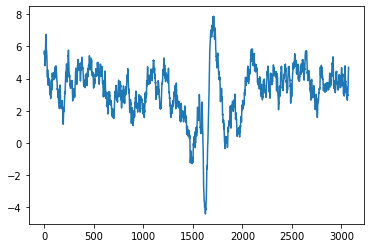

In [181]:
df1["Fz"][0:3072].plot()
print("subject: " + str(df1["subject"][0]))
print("diagnosis: " + diagnosis[df1["diagnosis"][0]])
print("condition: " + condition[df1["condition"][0]])
print()

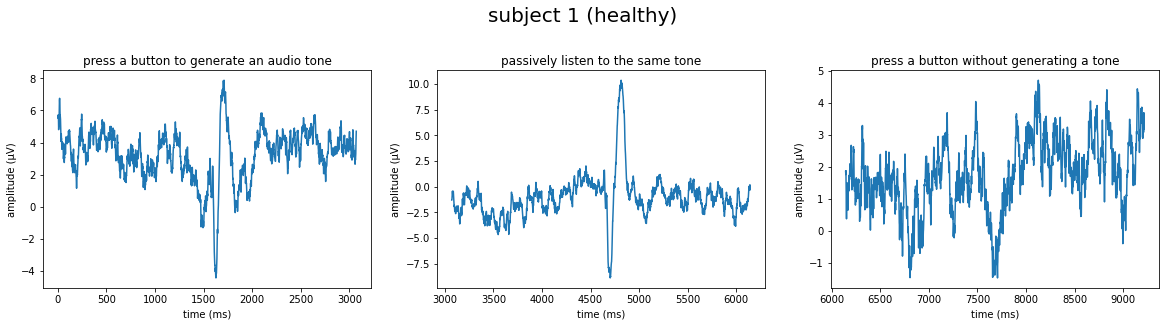

In [182]:
fig, axes = plt.subplots(nrows=1, ncols=3)

# axes.set_yticks(time_intervals)

fig.suptitle("subject " + str(df1["subject"][0]) + " (" + diagnosis[df1["diagnosis"][0]] + ")", fontsize=20, y=1.1, horizontalalignment='center')

fig.set_figheight(4)
fig.set_figwidth(20)

df1["Fz"][0:3072].plot(ax = axes[0])
axes[0].set_title(condition[df1["condition"][0]])

df1["Fz"][3072:3072+3072].plot(ax = axes[1])
axes[1].set_title(condition[df1["condition"][3072]])

df1["Fz"][3072+3072:3072+3072+3072].plot(ax = axes[2])
axes[2].set_title(condition[df1["condition"][3072+3072]])

for ax in axes.flat:
    ax.set(xlabel='time (ms)', ylabel='amplitude (µV)')

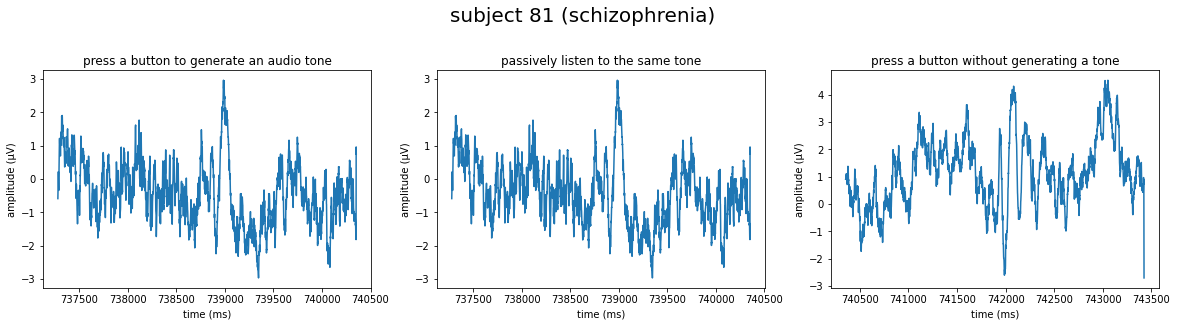

In [183]:
fig, axes = plt.subplots(nrows=1, ncols=3)

fig.suptitle("subject " + str(df1["subject"][737282]) + " (" + diagnosis[df1["diagnosis"][737282]] + ")", fontsize=20, y=1.1, horizontalalignment='center')

fig.set_figheight(4)
fig.set_figwidth(20)

df1["Fz"][737282:737282+3072].plot(ax = axes[0])
axes[0].set_title(condition[df1["condition"][737282]])

df1["Fz"][737282:737282+3072].plot(ax = axes[1])
axes[1].set_title(condition[df1["condition"][737282+3072]])

df1["Fz"][737282+3072:737282+3072+3072].plot(ax = axes[2])
axes[2].set_title(condition[df1["condition"][737282+3072+3072]])

for ax in axes.flat:
    ax.set(xlabel='time (ms)', ylabel='amplitude (µV)')

In [184]:
"""
Note that in these graphs, the total amount of time that is passed is 3000 miliseconds (3 seconds). the range of the graph should be -1500 to 1500
(because they counted 1.5 seconds before the stimulus and 1.5 after that)
"""

'\nNote that in these graphs, the total amount of time that is passed is 3000 miliseconds (3 seconds). the range of the graph should be -1500 to 1500\n(because they counted 1.5 seconds before the stimulus and 1.5 after that)\n'

In [185]:
# look at one electrode (Fz) for 1 subject

In [186]:
data_ex1 = df1['Fz']
print(data_ex1)

0         5.533701
1         5.651489
2         5.717580
3         5.703267
4         5.571578
            ...   
746491   -0.401267
746492   -0.440294
746493   -0.466162
746494   -0.472620
746495   -0.496193
Name: Fz, Length: 746496, dtype: float64


In [187]:
data_ex2 = df1['subject'][0:9216] # each subject has 9216 (3072*3) rows
# use = (use == True)
print(data_ex2)
type(data_ex2)

0       1
1       1
2       1
3       1
4       1
       ..
9211    1
9212    1
9213    1
9214    1
9215    1
Name: subject, Length: 9216, dtype: int64


pandas.core.series.Series

In [188]:
necessary_data_ex1 = df1[["Fz", "time_ms"]][0:9216]
yn_schiz = df1["diagnosis"][0]
print(necessary_data_ex1)
print()
if yn_schiz == 0:
  print("no schizophrenia")
else:
  print("schizophrenia")

            Fz    time_ms
0     5.533701 -1500.0000
1     5.651489 -1499.0234
2     5.717580 -1498.0469
3     5.703267 -1497.0703
4     5.571578 -1496.0938
...        ...        ...
9211  3.139738  1495.1172
9212  3.438934  1496.0938
9213  3.700720  1497.0703
9214  3.617369  1498.0469
9215  3.185478  1499.0234

[9216 rows x 2 columns]

no schizophrenia
